# Data Mining Project 3: Clustering

MSDS 7331 - Section 403 | Team Members: Sabitri KC, Rob Rivens, Andrew Walch

### Business Understanding

#### We chose to analyze a data set called "Diabetes 130-US Hospitals", which contains data collected on Diabetes patients for years 1999-2008. The data was prepared to analyze factors related to readmission as well as other outcomes pertaining to patients with diabetes.  We felt this would be an interesting Classification problem, as we have prior knowledge that Diabetes affects some people of certain racial ethnicities more than others.  We also thought looking at factors related to readmission could be related to other factors such as other illnesses, number of medications being taken or age.  We will measure the success of our algorithm by assessing the objective function, which is minimizing the Sum of Squared Errors (SSE).  We will perform cross-validation to also assess the accuracy of our algorith and chosen methods.



# need to answer: Why does your chosen validation method make sense for this specific dataset and the stakeholders needs?

### Data Understanding

# Need to answer Outliers? Are those mistakes? How do you deal with these problems?

The dataset represents 10 years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. It includes over 50 features representing patient and hospital outcomes. Information was extracted from the database for encounters that satisfied the following criteria:

- It is an inpatient encounter (a hospital admission)
- 	It is a diabetic encounter, that is, one during which any kind of diabetes was entered to the system as a diagnosis.
- 	The length of stay was at least 1 day and at most 14 days.
- 	Laboratory tests were performed during the encounter.
- 	Medications were administered during the encounter.
The data contains such attributes as patient number, race, gender, age, admission type, time in hospital, medical specialty of admitting physician, number of lab test performed, HbA1c test result, diagnosis, number of medication, diabetic medications, number of outpatient, inpatient, and emergency visits in the year before the hospitalization, etc.




### Data Structure

There were 55 attributes and 101,766 observations in the datset described as follows:

Feature Name, Type, Description and Range of Values, % Missing Data

Patient Data
- Encounter ID	Numeric	Unique identifier of an encounter	0%
- Patient number	Numeric	Unique identifier of a patient	0%
- Race	Nominal	Values: Caucasian, Asian, African American, Hispanic, and other	2%
- Gender	Nominal	Values: male, female, and unknown/invalid	0%
- Age	Nominal	Grouped in 10-year intervals: 0, 10), 10, 20), …, 90, 100)	0%
- Weight	Numeric	Weight in pounds.	97%

Admission/Hospital Stay Data
- Admission type	Nominal	Integer identifier corresponding to 9 distinct values, for example, emergency, urgent, elective, newborn, and not available	0%
- Discharge disposition	Nominal	Integer identifier corresponding to 29 distinct values, for example, discharged to home, expired, and not available	0%
- Admission source	Nominal	Integer identifier corresponding to 21 distinct values, for example, physician referral, emergency room, and transfer from a hospital	0%
- Time in hospital	Numeric	Integer number of days between admission and discharge	0%

Financial Data
- Payer code	Nominal	Integer identifier corresponding to 23 distinct values, for example, Blue Cross/Blue Shield, Medicare, and self-pay	52%

Medical Procedure/Drug Data
- Medical specialty	Nominal	Integer identifier of a specialty of the admitting physician, corresponding to 84 distinct values, for example, cardiology, internal medicine, family/general practice, and surgeon	53%
- Number of lab procedures	Numeric	Number of lab tests performed during the encounter	0%
- Number of procedures	Numeric	Number of procedures (other than lab tests) performed during the encounter	0%
- Number of medications	Numeric	Number of distinct generic names administered during the encounter	0%
- Number of outpatient visits	Numeric	Number of outpatient visits of the patient in the year preceding the encounter	0%
- Number of emergency visits	Numeric	Number of emergency visits of the patient in the year preceding the encounter	0%
- Number of inpatient visits	Numeric	Number of inpatient visits of the patient in the year preceding the encounter	0%
- Diagnosis 1	Nominal	The primary diagnosis (coded as first three digits of ICD9); 848 distinct values	0%
- Diagnosis 2	Nominal	Secondary diagnosis (coded as first three digits of ICD9); 923 distinct values	0%
- Diagnosis 3	Nominal	Additional secondary diagnosis (coded as first three digits of ICD9); 954 distinct values	1%
- Number of diagnoses	Numeric	Number of diagnoses entered to the system	0%
- Glucose serum test result	Nominal	Indicates the range of the result or if the test was not taken. Values: “>200,” “>300,” “normal,” and “none” if not measured	0%
- A1c test result	Nominal	Indicates the range of the result or if the test was not taken. Values: “>8” if the result was greater than 8%, “>7” if the result was greater than 7% but less than 8%, “normal” if the result was less than 7%, and “none” if not measured.	0%
- Change of medications	Nominal	Indicates if there was a change in diabetic medications (either dosage or generic name). Values: “change” and “no change”	0%
- Diabetes medications	Nominal	Indicates if there was any diabetic medication prescribed. Values: “yes” and “no”	0%
- 24 features for medications	Nominal	For the generic names: metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, sitagliptin, insulin, glyburide-metformin, glipizide-metformin, glimepiride-pioglitazone, metformin-rosiglitazone, and metformin-pioglitazone, the feature indicates whether the drug was prescribed or there was a change in the dosage. Values: “up” if the dosage was increased during the encounter, “down” if the dosage was decreased, “steady” if the dosage did not change, and “no” if the drug was not prescribed	0%

Readmission Data
- Readmitted	Nominal	Days to inpatient readmission. Values: “<30” if the patient was readmitted in less than 30 days, “>30” if the patient was readmitted in more than 30 days, and “No” for no record of readmission.	0%

Visualize any important attributes appropriately. Important: Provide an
interpretation for any charts or graphs.

In [128]:
#import libraries
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import warnings
import seaborn as sns
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from __future__ import print_function
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [129]:
df = pd.read_csv("/Users/yupster2/Documents/diabetic_data.csv",low_memory=False,parse_dates=True)  #read in the csv file

In [130]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide_metformin,glipizide_metformin,glimepiride_pioglitazone,metformin_rosiglitazone,metformin_pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            10176

In [132]:
del df['encounter_id']
del df['patient_nbr']
del df['weight']
del df['payer_code']
del df['medical_specialty']
del df['num_lab_procedures']
del df['diag_1']
del df['diag_2']
del df['diag_3']

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 41 columns):
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            101766 non-null int64
number_diagnoses            101766 non-null int64
max_glu_serum               101766 non-null object
A1Cresult                   101766 non-null object
metformin                   101766 non-null object
repaglinide                 101766 non-null object
nateglinide                 1017

In [134]:
df.metformin.replace(('Up', 'Down', 'No','Steady'), (1, 2, 3, 4), inplace=True)
df.repaglinide.replace(('Up', 'Down', 'No','Steady'), (1, 2, 3, 4), inplace=True)
df.nateglinide.replace(('Up', 'Down', 'No','Steady'), (1, 2, 3, 4), inplace=True)
df.chlorpropamide.replace(('Up', 'Down', 'No','Steady'), (1, 2, 3, 4), inplace=True)
df.glimepiride.replace(('Up', 'Down', 'No','Steady'), (1, 2, 3, 4), inplace=True)
df.acetohexamide.replace(('Up', 'Down', 'No','Steady'), (1, 2, 3, 4), inplace=True)
df.glipizide.replace(('Up', 'Down', 'No','Steady'), (1, 2, 3, 4), inplace=True)
df.glyburide.replace(('Up', 'Down', 'No','Steady'), (1, 2, 3, 4), inplace=True)
df.tolbutamide.replace(('Up', 'Down', 'No','Steady'), (1, 2, 3, 4), inplace=True)
df.pioglitazone.replace(('Up', 'Down', 'No','Steady'), (1, 2, 3, 4), inplace=True)
df.rosiglitazone.replace(('Up', 'Down', 'No','Steady'), (1, 2, 3, 4), inplace=True)
df.acarbose.replace(('Up', 'Down', 'No','Steady'), (1, 2, 3, 4), inplace=True)
df.miglitol.replace(('Up', 'Down', 'No','Steady'), (1, 2, 3, 4), inplace=True)
df.troglitazone.replace(('Up', 'Down', 'No','Steady'), (1, 2, 3, 4), inplace=True)
df.tolazamide.replace(('Up', 'Down', 'No','Steady'), (1, 2, 3, 4), inplace=True)
df.examide.replace(('Up', 'Down', 'No','Steady'), (1, 2, 3, 4), inplace=True)
df.citoglipton.replace(('Up', 'Down', 'No','Steady'), (1, 2, 3, 4), inplace=True)
df.insulin.replace(('Up', 'Down', 'No','Steady'), (1, 2, 3, 4), inplace=True)
df.glyburide_metformin.replace(('Up', 'Down', 'No','Steady'), (1, 2, 3, 4), inplace=True)
df.glipizide_metformin.replace(('Up', 'Down', 'No','Steady'), (1, 2, 3, 4), inplace=True)
df.glimepiride_pioglitazone.replace(('Up', 'Down', 'No','Steady'), (1, 2, 3, 4), inplace=True)
df.metformin_rosiglitazone.replace(('Up', 'Down', 'No','Steady'), (1, 2, 3, 4), inplace=True)
df.metformin_pioglitazone.replace(('Up', 'Down', 'No','Steady'), (1, 2, 3, 4), inplace=True)
df.change.replace(('Ch', 'No'), (1, 2), inplace=True)
df.diabetesMed.replace(('Yes', 'No'), (1, 2), inplace=True)

The original database contains incomplete, redundant, and noisy information as expected in any real-world data. There were several features that could not be treated directly since they had a high percentage of missing values. These features were weight (97% values missing), payer code (40%), and medical specialty (47%). Weight attribute was considered to be too sparse and it was not included in further analysis. Payer code was removed since it had a high percentage of missing values and it was not considered relevant to the outcome. Medical specialty attribute was dropped, as well.

Since we are primarily interested in factors that lead to early readmission, we defined the readmission attribute (outcome) as having two values: “readmitted,” if the patient was readmitted within 30 days of discharge or “otherwise,” which covers both readmission after 30 days and no readmission at all. The values of the readmission attribute were determined by examination of all patient records in the database to determine the first inpatient visit after discharge. Note that 30 days was chosen based on criteria often used by funding agencies.

In [135]:
df.readmitted.replace(('<30','>30', 'NO'), (1,0,0), inplace=True) #Change Readmission to binary response <30 = 1; >30 or No = 0

In [136]:
df.A1Cresult.replace(('>7','>8','Norm', 'None'), (0,0,0,1), inplace=True) #Change A1C results to binary response to indicate whether it was tested or not

In [137]:
df.race.replace(('AfricanAmerican', 'Asian', 'Caucasian', 'Hispanic', 'Other'), (1,2,3,4,5), inplace=True)

In [138]:
df = df[df.race != '?']

In [139]:
df.gender.replace(('Male', 'Female'), (1,2), inplace=True)

In [140]:
df = df[df.gender != 'Unknown/Invalid']

In [141]:
df.age.replace(('[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)', '[60-70)', '[70-80)', '[80-90)', '[90-100)'), (1,2,3,4,5,6,7,8,9,10), inplace=True)

In [142]:
df.max_glu_serum.replace(('>200', '>300', 'None', 'Norm'), (1,2,3,4), inplace=True)

In [143]:
df.dropna(inplace=True)

In [144]:
df

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_procedures,num_medications,number_outpatient,...,citoglipton,insulin,glyburide_metformin,glipizide_metformin,glimepiride_pioglitazone,metformin_rosiglitazone,metformin_pioglitazone,change,diabetesMed,readmitted
0,3,2,1,6,25,1,1,0,1,0,...,3,3,3,3,3,3,3,2,2,0
1,3,2,2,1,1,7,3,0,18,0,...,3,1,3,3,3,3,3,1,1,0
2,1,2,3,1,1,7,2,5,13,2,...,3,3,3,3,3,3,3,2,1,0
3,3,1,4,1,1,7,2,1,16,0,...,3,1,3,3,3,3,3,1,1,0
4,3,1,5,1,1,7,1,0,8,0,...,3,4,3,3,3,3,3,1,1,0
5,3,1,6,2,1,2,3,6,16,0,...,3,4,3,3,3,3,3,2,1,0
6,3,1,7,3,1,2,4,1,21,0,...,3,4,3,3,3,3,3,1,1,0
7,3,1,8,1,1,7,5,0,12,0,...,3,3,3,3,3,3,3,2,1,0
8,3,2,9,2,1,4,13,2,28,0,...,3,4,3,3,3,3,3,1,1,0
9,3,2,10,3,3,4,12,3,18,0,...,3,4,3,3,3,3,3,1,1,0


In [145]:
df.race = (df.race-df.race.mean())/df.race.std()
df.gender = (df.gender-df.gender.mean())/df.gender.std()
df.age = (df.age-df.age.mean())/df.age.std()
df.admission_type_id = (df.admission_type_id-df.admission_type_id.mean())/df.admission_type_id.std()
df.discharge_disposition_id = (df.discharge_disposition_id-df.discharge_disposition_id.mean())/df.discharge_disposition_id.std()
df.admission_source_id = (df.admission_source_id-df.admission_source_id.mean())/df.admission_source_id.std()
df.time_in_hospital = (df.time_in_hospital-df.time_in_hospital.mean())/df.time_in_hospital.std()
df.num_procedures = (df.num_procedures-df.num_procedures.mean())/df.num_procedures.std()
df.num_medications = (df.num_medications-df.num_medications.mean())/df.num_medications.std()
df.number_outpatient = (df.number_outpatient-df.number_outpatient.mean())/df.number_outpatient.std()
df.number_emergency = (df.number_emergency-df.number_emergency.mean())/df.number_emergency.std()
df.number_inpatient = (df.number_inpatient-df.number_inpatient.mean())/df.number_inpatient.std()
df.number_diagnoses = (df.number_diagnoses-df.number_diagnoses.mean())/df.number_diagnoses.std()
df.max_glu_serum = (df.max_glu_serum-df.max_glu_serum.mean())/df.max_glu_serum.std()
df.A1Cresult = (df.A1Cresult-df.A1Cresult.mean())/df.A1Cresult.std()
df.metformin = (df.metformin-df.metformin.mean())/df.metformin.std()
df.repaglinide = (df.repaglinide-df.repaglinide.mean())/df.repaglinide.std()
df.nateglinide = (df.nateglinide-df.nateglinide.mean())/df.nateglinide.std()
df.chlorpropamide = (df.chlorpropamide-df.chlorpropamide.mean())/df.chlorpropamide.std()
df.glimepiride = (df.glimepiride-df.glimepiride.mean())/df.glimepiride.std()
df.acetohexamide = (df.acetohexamide-df.acetohexamide.mean())/df.acetohexamide.std()
df.glipizide = (df.glipizide-df.glipizide.mean())/df.glipizide.std()
df.glyburide = (df.glyburide-df.glyburide.mean())/df.glyburide.std()
df.tolbutamide = (df.tolbutamide-df.tolbutamide.mean())/df.tolbutamide.std()
df.pioglitazone = (df.pioglitazone-df.pioglitazone.mean())/df.pioglitazone.std()
df.rosiglitazone = (df.rosiglitazone-df.rosiglitazone.mean())/df.rosiglitazone.std()
df.acarbose = (df.acarbose-df.acarbose.mean())/df.acarbose.std()
df.miglitol = (df.miglitol-df.miglitol.mean())/df.miglitol.std()
df.troglitazone = (df.troglitazone-df.troglitazone.mean())/df.troglitazone.std()
df.tolazamide = (df.tolazamide-df.tolazamide.mean())/df.tolazamide.std()
df.examide = (df.examide-df.examide.mean())/df.examide.std()
df.citoglipton = (df.citoglipton-df.citoglipton.mean())/df.citoglipton.std()
df.insulin = (df.insulin-df.insulin.mean())/df.insulin.std()
df.glyburide_metformin = (df.glyburide_metformin-df.glyburide_metformin.mean())/df.glyburide_metformin.std()
df.glipizide_metformin = (df.glipizide_metformin-df.glipizide_metformin.mean())/df.glipizide_metformin.std()
df.glimepiride_pioglitazone = (df.glimepiride_pioglitazone-df.glimepiride_pioglitazone.mean())/df.glimepiride_pioglitazone.std()
df.metformin_rosiglitazone = (df.metformin_rosiglitazone-df.metformin_rosiglitazone.mean())/df.metformin_rosiglitazone.std()
df.metformin_ioglitazone = (df.metformin_pioglitazone-df.metformin_pioglitazone.mean())/df.metformin_pioglitazone.std()
df.change = (df.change-df.change.mean())/df.change.std()
df.diabetesMed = (df.diabetesMed-df.diabetesMed.mean())/df.diabetesMed.std()

/Users/yupster2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:38: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access


In [146]:
df

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_procedures,num_medications,number_outpatient,...,citoglipton,insulin,glyburide_metformin,glipizide_metformin,glimepiride_pioglitazone,metformin_rosiglitazone,metformin_pioglitazone,change,diabetesMed,readmitted
0,0.396654,0.925771,-3.823153,2.738211,4.004043,-1.171399,-1.137759,-0.786847,-1.850603,-0.292415,...,NaN,0.045939,-0.078964,-0.011432,-0.00317,NaN,3,0.925640,1.82360,0
1,0.396654,0.925771,-3.195946,-0.708020,-0.516231,0.301751,-0.468184,-0.786847,0.243042,-0.292415,...,NaN,-2.105427,-0.078964,-0.011432,-0.00317,NaN,3,-1.080323,-0.54836,0
2,-1.9238,0.925771,-2.568740,-0.708020,-0.516231,0.301751,-0.802972,2.147966,-0.372736,1.273995,...,NaN,0.045939,-0.078964,-0.011432,-0.00317,NaN,3,0.925640,-0.54836,0
3,0.396654,-1.08017,-1.941533,-0.708020,-0.516231,0.301751,-0.802972,-0.199884,-0.003269,-0.292415,...,NaN,-2.105427,-0.078964,-0.011432,-0.00317,NaN,3,-1.080323,-0.54836,0
4,0.396654,-1.08017,-1.314327,-0.708020,-0.516231,0.301751,-1.137759,-0.786847,-0.988514,-0.292415,...,NaN,1.121622,-0.078964,-0.011432,-0.00317,NaN,3,-1.080323,-0.54836,0
5,0.396654,-1.08017,-0.687120,-0.018774,-0.516231,-0.925874,-0.468184,2.734929,-0.003269,-0.292415,...,NaN,1.121622,-0.078964,-0.011432,-0.00317,NaN,3,0.925640,-0.54836,0
6,0.396654,-1.08017,-0.059914,0.670472,-0.516231,-0.925874,-0.133397,-0.199884,0.612509,-0.292415,...,NaN,1.121622,-0.078964,-0.011432,-0.00317,NaN,3,-1.080323,-0.54836,0
7,0.396654,-1.08017,0.567292,-0.708020,-0.516231,0.301751,0.201390,-0.786847,-0.495892,-0.292415,...,NaN,0.045939,-0.078964,-0.011432,-0.00317,NaN,3,0.925640,-0.54836,0
8,0.396654,0.925771,1.194499,-0.018774,-0.516231,-0.434824,2.879687,0.387078,1.474598,-0.292415,...,NaN,1.121622,-0.078964,-0.011432,-0.00317,NaN,3,-1.080323,-0.54836,0
9,0.396654,0.925771,1.821705,0.670472,-0.139542,-0.434824,2.544900,0.974041,0.243042,-0.292415,...,NaN,1.121622,-0.078964,-0.011432,-0.00317,NaN,3,-1.080323,-0.54836,0


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99492 entries, 0 to 101765
Data columns (total 41 columns):
race                        99492 non-null object
gender                      99492 non-null object
age                         99492 non-null float64
admission_type_id           99492 non-null float64
discharge_disposition_id    99492 non-null float64
admission_source_id         99492 non-null float64
time_in_hospital            99492 non-null float64
num_procedures              99492 non-null float64
num_medications             99492 non-null float64
number_outpatient           99492 non-null float64
number_emergency            99492 non-null float64
number_inpatient            99492 non-null float64
number_diagnoses            99492 non-null float64
max_glu_serum               99492 non-null float64
A1Cresult                   99492 non-null float64
metformin                   99492 non-null float64
repaglinide                 99492 non-null float64
nateglinide              

In [148]:
del df['examide']
del df['citoglipton']
del df['metformin_rosiglitazone']

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99492 entries, 0 to 101765
Data columns (total 38 columns):
race                        99492 non-null object
gender                      99492 non-null object
age                         99492 non-null float64
admission_type_id           99492 non-null float64
discharge_disposition_id    99492 non-null float64
admission_source_id         99492 non-null float64
time_in_hospital            99492 non-null float64
num_procedures              99492 non-null float64
num_medications             99492 non-null float64
number_outpatient           99492 non-null float64
number_emergency            99492 non-null float64
number_inpatient            99492 non-null float64
number_diagnoses            99492 non-null float64
max_glu_serum               99492 non-null float64
A1Cresult                   99492 non-null float64
metformin                   99492 non-null float64
repaglinide                 99492 non-null float64
nateglinide              

In [150]:
df.describe()

,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,troglitazone,tolazamide,insulin,glyburide_metformin,glipizide_metformin,glimepiride_pioglitazone,metformin_pioglitazone,change,diabetesMed,readmitted
count,9.949200e+04,9.949200e+04,9.949200e+04,9.949200e+04,9.949200e+04,9.949200e+04,9.949200e+04,9.949200e+04,9.949200e+04,9.949200e+04,...,9.949200e+04,9.949200e+04,9.949200e+04,9.949200e+04,9.949200e+04,9.949200e+04,99492.00000,9.949200e+04,9.949200e+04,99492.000000
mean,-3.591666e-14,1.214236e-13,9.363072e-14,-4.057930e-14,9.678773e-15,-3.881693e-15,5.584063e-15,6.615782e-14,2.580750e-14,1.519501e-14,...,-1.319560e-14,-2.071161e-14,3.281063e-14,-4.876275e-14,1.310000e-14,-3.706104e-15,3.00001,-1.011403e-13,6.395216e-14,0.112260
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.00317,1.000000e+00,1.000000e+00,0.315688
min,-3.823153e+00,-7.080201e-01,-5.162310e-01,-1.171399e+00,-1.137759e+00,-7.868469e-01,-1.850603e+00,-2.924148e-01,-2.141988e-01,-5.058378e-01,...,-5.491246e-03,-9.737404e+01,-2.105427e+00,-2.403109e+01,-1.143151e-02,-3.170341e-03,3.00000,-1.080323e+00,-5.483603e-01,0.000000
25%,-6.871205e-01,-7.080201e-01,-5.162310e-01,-1.171399e+00,-8.029717e-01,-7.868469e-01,-7.422028e-01,-2.924148e-01,-2.141988e-01,-5.058378e-01,...,-5.491246e-03,-1.761363e-02,4.593913e-02,-7.896409e-02,-1.143151e-02,-3.170341e-03,3.00000,-1.080323e+00,-5.483603e-01,0.000000
50%,-5.991406e-02,-7.080201e-01,-5.162310e-01,3.017510e-01,-1.333973e-01,-1.998842e-01,-1.264248e-01,-2.924148e-01,-2.141988e-01,-5.058378e-01,...,-5.491246e-03,-1.761363e-02,4.593913e-02,-7.896409e-02,-1.143151e-02,-3.170341e-03,3.00000,9.256398e-01,-5.483603e-01,0.000000
75%,5.672924e-01,6.704722e-01,4.880319e-02,3.017510e-01,5.361770e-01,3.870784e-01,4.893533e-01,-2.924148e-01,-2.141988e-01,2.807153e-01,...,-5.491246e-03,-1.761363e-02,1.121622e+00,-7.896409e-02,-1.143151e-02,-3.170341e-03,3.00000,9.256398e-01,-5.483603e-01,0.000000
max,1.821705e+00,4.116703e+00,4.569077e+00,4.721200e+00,3.214474e+00,2.734929e+00,8.001845e+00,3.260220e+01,8.063850e+01,1.601178e+01,...,1.821062e+02,4.866060e+01,1.121622e+00,1.189710e+01,8.747659e+01,3.154204e+02,4.00000,9.256398e-01,1.823600e+00,1.000000


In [154]:
features = ['race', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'insulin', 'glyburide_metformin', 'glipizide_metformin', 'glimepiride_pioglitazone', 'metformin_pioglitazone', 'change', 'diabetesMed']

In [155]:
x = df.loc[:, features].values

In [157]:
y = df.loc[:,['readmitted']].values

In [158]:
x = StandardScaler().fit_transform(x)

/Users/yupster2/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [159]:
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2',  'principal component 3',  'principal component 4',  'principal component 5'])

In [160]:
finalDf = pd.concat([principalDf, df[['readmitted']]], axis = 1)

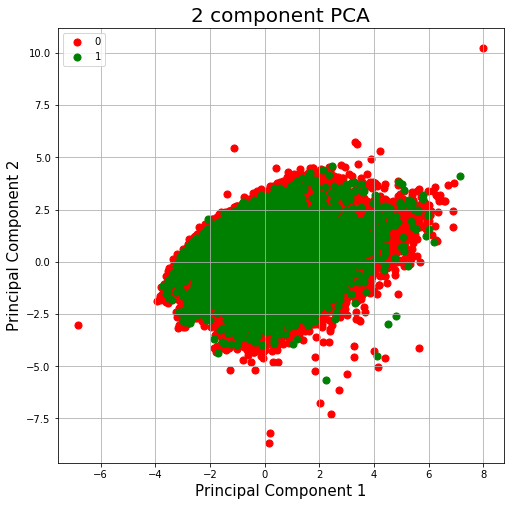

In [162]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g', 'b']
for y, color in zip(targets,colors):
    indicesToKeep = finalDf['readmitted'] == y
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

Need to visualize data here.  I think we should show # of procedures, inpatient visits and count diabetes medications, by race.  We should also show number of readmitted by age group and race.

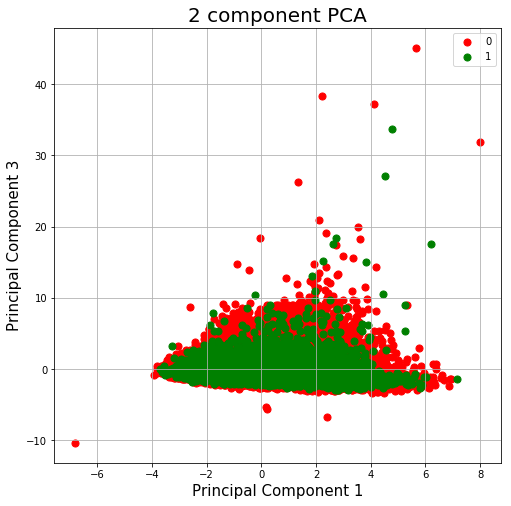

In [163]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g', 'b']
for y, color in zip(targets,colors):
    indicesToKeep = finalDf['readmitted'] == y
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

## Baseline Classification Performance
Performing 10 fold cross validation and using the raw features in a Random Forest classifer. Getting the average accuracy of classifying whether a person is readmitted within 30 days.

In [165]:
y = finalDf['readmitted']
X = finalDf[['principal component 1','principal component 2']]
cv = StratifiedKFold(n_splits=10)

clf = RandomForestClassifier(n_estimators=150,random_state=1)

acc = cross_val_score(clf,X,y=y,cv=cv)

print ("Average accuracy = ", acc.mean()*100, "+-", acc.std()*100)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

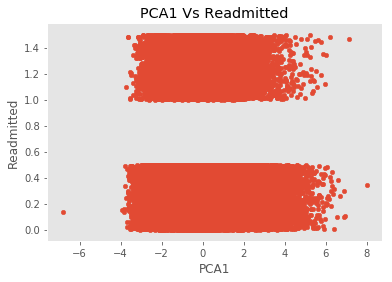

In [167]:
from matplotlib import pyplot as plt
plt.style.use("ggplot")

%matplotlib inline
X1 = finalDf[['readmitted','principal component 1']].values

plt.scatter(X1[:, 1], X1[:, 0]+np.random.random(X1[:, 1].shape)/2, 
             s=20)
plt.xlabel('PCA1'), plt.ylabel('Readmitted')
plt.grid()
plt.title('PCA1 Vs Readmitted')
plt.show()

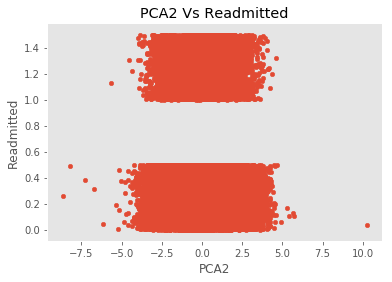

In [168]:
from matplotlib import pyplot as plt
plt.style.use("ggplot")

%matplotlib inline
X1 = finalDf[['readmitted','principal component 2']].values

plt.scatter(X1[:, 1], X1[:, 0]+np.random.random(X1[:, 1].shape)/2, 
             s=20)
plt.xlabel('PCA2'), plt.ylabel('Readmitted')
plt.grid()
plt.title('PCA2 Vs Readmitted')
plt.show()

## Deployment

Hemoglobin A1c (HbA1c) is an important measure of glucose control, which is widely applied to measure performance of diabetes care. The measurement of HbA1c at the time of hospital admission offers a unique opportunity to assess the efficacy of current therapy and to make changes in that therapy if indicated (e.g., HbA1c > 8.0% on current regimen). 

We considered four groups of encounters: (1) no HbA1c test performed, (2) HbA1c performed and in normal range, (3) HbA1c performed and the result is greater than 8% with no change in diabetic medications, and (4) HbA1c performed, result is greater than 8%, and diabetic medication was changed.

The statistical model suggests that the relationship between the probability of readmission and the HbA1c measurement depends on the primary diagnosis. The data suggest further that the greater attention to diabetes reflected in HbA1c determination may improve patient outcomes and lower cost of inpatient care.

In conclusion, the decision to obtain a measurement of HbA1c for patients with diabetes mellitus is a useful predictor of readmission rates which may prove valuable in the development of strategies to reduce readmission rates and costs for the care of individuals with diabetes mellitus. The profile of readmission differed significantly in patients where Hba1c was checked in the setting of a primary diabetes diagnosis, when compared to those with a primary circulatory disorder. While readmission rates remained the highest for patients with circulatory diagnoses, readmission rates for patients with diabetes appeared to be associated with the decision to test for HbA1c, rather than the values of the HbA1c result.